## Lab 7 - QR 1 

In [5]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1

In [20]:
# Modified Gram Schmidt Function

def gsmod(A):
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n,n))
    for i in range(0,n):
        R[i,i] = scipy.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j] = np.inner(Q[:,j], Q[:,i])
            Q[:,j] += - R[i,j]*Q[:,i]
    return Q, R

In [27]:
# Lets test the Function

A = np.random.random((6,4))
Q,R = scipy.linalg.qr(A, mode="economic")
Q2, R2 = gsmod(A)

print(A.shape, Q2.shape, R2.shape)

#Verify that R is upper triangular, Q is orthonormal, and QR = A
print(np.allclose(np.triu(R2), R2))
print(np.allclose(np.dot(Q2.T, Q2), np.identity(4)))
print(np.allclose(np.dot(Q2,R2), A))

(6, 4) (6, 4) (4, 4)
True
True
True


### Problem 2

In [50]:
# Determinant Function

def absdet(A):
    if A.shape[0] != A.shape[1]:
        raise ValueError("Please Enter an nxn matrix")
    else:
        return np.absolute(gsmod(A)[1].diagonal()).prod()

In [51]:
#Testing Function
A2 = np.random.random((6,6))

print("Error = " + str(absdet(A2) - abs(scipy.linalg.det(A2))))

Error = -3.46944695195e-17


### Problem 3

In [116]:
# Linear Solver

def linsolv(A, b):
    if A.shape[0] != A.shape[1]:
        raise ValueError("Please Enter an nxn matrix")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Matrix and vector sizes don't match")
    n = A.shape[1]
    Qtemp, Rtemp = gsmod(A)
    yvec = np.dot(Qtemp.T, b)
    xvec = np.copy(b)
    xvec[-1] =  yvec[-1] /Rtemp[-1,-1]
    for i in range(n-2,-1,-1):
        xvec[i] = (yvec[i] - np.dot(Rtemp[i, i+1:], xvec[i+1:]))/ Rtemp[i,i]
    return xvec
        

In [120]:
# Comparing Function with scipy linalg solve output
A3 = np.random.random((6,6))
b = np.random.random(6)

print(scipy.linalg.norm(linsolv(A3,b) -scipy.linalg.solve(A3, b)))

3.2910576155218694e-14


### Problem 4

In [159]:
# QR Decomp with Householder

def householder(A):
    m,n = np.shape(A)
    R = np.copy(A)
    Q = np.eye(m)
    sign = lambda x: 1 if x >= 0 else -1
    for k in range(0,n):
        u = np.copy(R[k:,k])
        u[0] = u[0] + sign(u[0])*scipy.linalg.norm(u)
        u = u / scipy.linalg.norm(u)
        R[k:,k:] = R[k:,k:] - 2*np.outer(u, np.inner(u, R[k:,k:].T))
        Q[k:,:] = Q[k:,:] - 2*np.outer(u, np.inner(u, Q[k:,:].T))
    return Q.T, R


In [166]:
#Testing the function

A4 = np.random.random((6,4))
Q, R = householder(A)
Q2, R2 = scipy.linalg.qr(A, mode="full")

print(np.allclose(np.dot(Q,R), A))
print(np.allclose(Q, Q2))
print(np.allclose(R, R2))

True
True
True


### Problem 5

In [186]:
# Hessenberg Matrix

def hessenberg(A):
    m,n = np.shape(A)
    H = np.copy(A)
    Q = np.eye(m)
    sign = lambda x: 1 if x >=0 else -1
    for k in range(0,n-2):
        u = np.copy(H[k+1:, k])
        u[0] = u[0] + sign(u[0])*scipy.linalg.norm(u)
        u = u/ scipy.linalg.norm(u)
        H[k+1:, k:] = H[k+1:, k:] - 2*np.outer(u, np.inner(u, H[k+1:,k:].T))
        H[:, k+1:] = H[:, k+1:] - 2*np.outer(np.inner(H[:, k+1:],u), u)
        Q[k+1:, :] = Q[k+1:, :] - 2*np.outer(u, np.inner(u, Q[k+1:,:].T))
    return H, Q.T

In [196]:
# Checking Function

A5 = np.random.random((8,8))
H, Q = scipy.linalg.hessenberg(A5, calc_q = True)
H2, Q2 = hessenberg(A5)

print(np.allclose(np.triu(H2, -1), H2))
print(np.allclose(np.dot(np.dot(Q2, H2), Q2.T), A5))
print(np.allclose(H, H2))
print(np.allclose(Q, Q2))

True
True
True
True


## Lab 8 - QR 2

### Problem 1

In [214]:
# Defining the function

def linsolve2(A, b):
    Q, R = gsmod(A)
    yvec = np.dot(Q.T, b)
    return scipy.linalg.solve_triangular(R, yvec)


In [217]:
# Comparing Function with scipy linalg solve output
A1 = np.random.random((100,6))
b = np.random.random(100)

linsolve2(A1, b)

array([ 0.16125075,  0.08132898,  0.140217  ,  0.13179467,  0.09379983,
        0.26797651])

### Problem 2

In [269]:
#Load Data
housing = np.load('housing.npy')

A_housing = np.column_stack((np.ones_like(housing[:,0]), housing[:,0]))
b_housing = housing[:,1]

#Solving
coef = linsolve2(A_housing,b_housing)

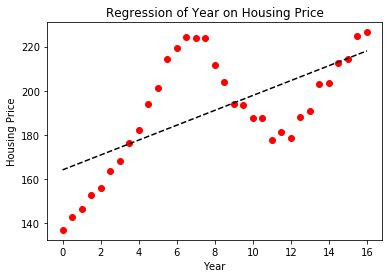

In [270]:
#Lets plot the graph

#Getting fitted values
fitted = coef[0] + coef[1]*housing[:,0]

plt.plot(housing[:,0], housing[:,1],"or")
plt.plot(housing[:,0], fitted, "--k")
plt.xlabel("Year")
plt.ylabel("Housing Price")
plt.title("Regression of Year on Housing Price")
plt.show()

### Problem 3

In [288]:
# Creating function

def bestfitpoly(A, b, degree):
    xgrid = np.linspace(np.min(A),np.max(A), 100)
    bestfit = {}
    for i in degree:
        polytemp = np.vander(A,i+1)
        coeftemp = linsolve2(polytemp, b)
        f = np.poly1d(coeftemp)
        bestfit["fit"+str(i)] = f(xgrid)
    return bestfit

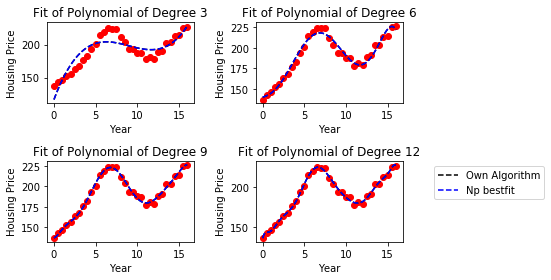

In [300]:
# Plotting Graph
degree = [3,6,9,12]
res = bestfitpoly(A_housing[:,1], b_housing, degree)
xgrid = np.linspace(np.min(A_housing[:,1]),np.max(A_housing[:,1]), 100)

for i in range(0,4):
    npres = np.polyfit(A_housing[:,1], b_housing, degree[i])
    ftemp = np.poly1d(npres)
    plt.subplot(2,2,i+1)
    plt.plot(housing[:,0], housing[:,1],"or")
    plt.plot(xgrid, res["fit"+str(degree[i])], "--k", label="Own Algorithm")
    plt.plot(xgrid, ftemp(xgrid), "--b", label="Np bestfit")
    plt.xlabel("Year")
    plt.ylabel("Housing Price")
    plt.title("Fit of Polynomial of Degree " + str(degree[i]))

plt.tight_layout()
plt.legend(bbox_to_anchor=(2,1),loc="upper right", ncol=1)
plt.show()


Our results clearly overlap with the NP bestfit function results.

### Problem 4

In [316]:
# Calculating fit of an Ellipse
ellipse = np.load("ellipse.npy")

b_ellipse = np.ones_like(ellipse[:,0])
A_ellipse = np.column_stack((ellipse[:,1]**2, ellipse[:,1], ellipse[:,0]*ellipse[:,1], ellipse[:,0], ellipse[:,0]**2))

a,b,c,d,e = linsolve2(A_ellipse, b_ellipse)

# Function to plot Ellipse
def plot_ellipse(a,b,c,d,e):
    ''' Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 =1'''
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect('equal','datalim')

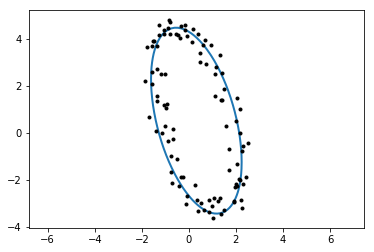

In [319]:
# Plotting graph

plot_ellipse(a,b,c,d,e)
plt.plot(ellipse[:,1], ellipse[:,0], 'k.')
plt.show()

### Problem 5

In [343]:
# Function for Power Method

def powermethod(A, N=500, tol=1e-6):
    m,n = np.shape(A)
    x0 = np.random.random(n)
    x0 = x0/scipy.linalg.norm(x0)
    it = 0
    error = 1
    while it < N and error > tol:
        x1 = A.dot(x0)
        x1 = x1 / scipy.linalg.norm(x1)
        error = scipy.linalg.norm(x1 - x0)
        x0 = x1
    return np.inner(x0, A.dot(x0)), x0

In [345]:
# Testing the function

# Construct Random Matrix of Positive Values
A = np.random.random((10,10))
eigs, vecs = scipy.linalg.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

lamb2, x2 = powermethod(A)
# Verifing results
print("Error between scipy and homemade function = " + str(lamb2 - lamb))
print(np.allclose(A.dot(x2), lamb2*x2))

Error between scipy and homemade function = (-3.58207952189e-09+0j)
True


### Problem 6

In [804]:
# Function for eigenvalue calculation
import cmath

def qreig(A, N=100, tol=1e-6):
    m,n = np.shape(A)
    S = scipy.linalg.hessenberg(A)
    for k in range(1,N):
        Q, R = scipy.linalg.qr(S)
        S = R.dot(Q)
    eigs = []
    i = 0 
    while i < n-2:
        if abs(S[i+1,i]) < tol:
            eigs.append(S[i,i])
        else:
            a,b,c,d = S[i,i], S[i,i+1], S[i+1,i], S[i+1,i+1]
            eigs.append((a*d + cmath.sqrt((a+d)**2 - 4*1*(a*d - b*c)))/2)
            eigs.append((a*d - cmath.sqrt((a+d)**2 - 4*1*(a*d - b*c)))/2)
            i += 1
        i += 1
    if abs(S[n-1, n-2]) > tol:
        a, b, c, d = S[n-2, n-2], S[n-2, n-1], S[n-1, n-2], S[n-1,n-1]
        eigs.append((a*d + cmath.sqrt((a+d)**2 - 4*1*(a*d - b*c)))/2)
        eigs.append((a*d - cmath.sqrt((a+d)**2 - 4*1*(a*d - b*c)))/2)
    else:
        eigs.append(S[n-2, n-2])
        eigs.append(S[n-1, n-1])
    return eigs

In [805]:
# Testing Function
A = np.random.random((3,3)) + np.random.random((3,3)).T

print(qreig(A))
print(scipy.linalg.eig(A)[0])

[3.175063733136938, 0.36061018855040172, -0.20595202396414236]
[ 3.17506373+0.j -0.20595202+0.j  0.36061019+0.j]


Our values do match those form scipy's eigenvalue routine, but this is not always an exact match.

## Lab 10 - SVD

### Problem 1

In [555]:
# Function for Truncated SVD

def truncated_svd(A, k= None):
    A = np.matrix(A)
    sigma, V = scipy.linalg.eig(A.getH().dot(A))
    nonzero = np.nonzero(sigma)[0]
    # Removing non-zero eigenvals
    sigma = sigma[nonzero]
    V = V[:,nonzero]
    # Sorting
    idx = np.argsort(sigma)[::-1]
    sigma = sigma[idx]
    V = V[:,idx]
    # Compact v Truncated
    if k == None:
        Ediag = sigma
        V = V.T
        U =A.dot(V).dot(np.diag(1/Ediag))
        return U, Ediag, V
    elif len(sigma) > k:
        Ediag = sigma[range(0,k+1)]
        V = V.T[:,:k+1]
        U = A.dot(V).dot(np.diag(1/Ediag))       
        return U, Ediag, V
    else:
        Ediag = sigma
        V = V.T
        U = A.dot(V).dot(np.diag(1/Ediag))
        return U, Ediag, V
    

In [558]:
# Testing Function
A = np.random.random((6,4))
U, Ediag, V = truncated_svd(A)
print(np.allclose(A, U.dot(np.diag(Ediag)).dot(np.matrix(V).getH())))

True


### Problem 2

C:\Users\Kenneth\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


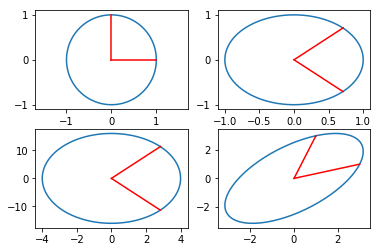

In [649]:
A = np.array([[3,1],[1,3]])
U, Ediag, V = truncated_svd(A)

# Lets generate some points on the unit circle
theta = np.linspace(0,2*np.pi, 200)
points = np.vstack((np.cos(theta), np.sin(theta)))
basis = np.array([0,1])
basis2 = np.array([1,0])

plt.subplot(221)
plt.plot(points[0,:], points[1,:])
plt.plot(basis2,[0,0], "r")
plt.plot([0,0], basis, "r")
plt.axis('equal')

plt.subplot(222)
step1 = np.array(np.matrix(V).getH().dot(points))
plt.plot(step1[1,:], step1[0,:])
bt1 = np.array(np.matrix(V).getH().dot(basis))[0]
bt2 = np.array(np.matrix(V).getH().dot(basis2))[0]
plt.plot([bt1[1],0], [bt1[0],0], "r")
plt.plot([bt2[1],0], [bt2[0],0], "r")

plt.subplot(223)
step2 = np.array(np.diag(Ediag).dot(step1))
plt.plot(step2[1,:], step2[0,:])
bt3 = np.array(np.diag(Ediag).dot(bt1))
bt4 = np.array(np.diag(Ediag).dot(bt2))
plt.plot([bt3[1],0], [bt3[0],0], "r")
plt.plot([bt4[1],0], [bt4[0],0], "r")

plt.subplot(224)
step3 = np.array(U.dot(step2))
plt.plot(step3[1,:], step3[0,:])
bt5 = np.array(U.dot(bt3))[0]
bt6 = np.array(U.dot(bt4))[0]
plt.plot([bt5[1],0], [bt5[0],0], "r")
plt.plot([bt6[1],0], [bt6[0],0], "r")

plt.show()

### Problem 3

In [680]:
# Writing Function

def svd_approx(A, k):
    Ut, st, Vht = scipy.linalg.svd(A, full_matrices = False)
    if k < len(st):
        St = np.diag(st[:k])
        Ahat = Ut[:,:k].dot(St).dot(Vht[:k,:])
        return Ahat
    else:
        St = np.diag(st)
        return Ut.dot(St).dot(Vht)

In [671]:
svd_approx(A,1)

array([[ 0.40906331,  0.39478088,  0.43166534,  0.5313518 ,  0.4609553 ,
         0.35252307,  0.49336064,  0.56773835],
       [ 0.46506067,  0.4488231 ,  0.49075673,  0.60408944,  0.52405624,
         0.40078054,  0.5608976 ,  0.645457  ],
       [ 0.5102322 ,  0.49241747,  0.53842414,  0.6627649 ,  0.57495804,
         0.43970852,  0.61537782,  0.70815051],
       [ 0.4934498 ,  0.47622103,  0.52071446,  0.64096544,  0.5560467 ,
         0.42524576,  0.595137  ,  0.68485824],
       [ 0.41938018,  0.40473754,  0.44255225,  0.54475288,  0.47258092,
         0.36141395,  0.50580355,  0.58205712],
       [ 0.46536291,  0.44911479,  0.49107567,  0.60448203,  0.52439682,
         0.401041  ,  0.56126213,  0.64587648],
       [ 0.55714873,  0.53769591,  0.58793295,  0.723707  ,  0.62782619,
         0.4801403 ,  0.67196262,  0.77326588],
       [ 0.56239801,  0.54276191,  0.59347227,  0.73052555,  0.63374138,
         0.48466403,  0.67829365,  0.78055135]])

### Problem 4

In [678]:
# Writing Function

def find_lowest(A, e):
    U, s, Vh = scipy.linalg.svd(A, full_matrices = False)
    k = 0
    error = s[0]
    while error > e and k < len(s):
        error = s[k]
        k += 1
    return k

def lowest_rank_approx(A,e):
    k = find_lowest(A, e)
    result = svd_approx(A, k)
    return result

### Problem 5

In [704]:
def compress_image(filename, k):
    X = plt.imread(filename)[:,:,:].astype(float)
    X = X/255
    Xr = X[:,:,0]
    Xb = X[:,:,1]
    Xg = X[:,:,2]
    Xr2 = svd_approx(Xr, k)
    Xb2 = svd_approx(Xb, k)
    Xg2 = svd_approx(Xg, k)
    X2 = np.dstack((Xr2, Xb2, Xg2))
    X2[ X2 < 0 ] = 0
    X2[ X2 > 1 ] = 1
    plt.subplot(121)
    plt.imshow(X)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(X2)
    plt.title("Rank "+str(k)+ " Approximation")
    plt.show()

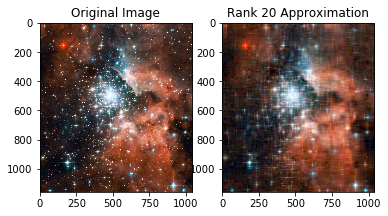

In [705]:
compress_image("hubble.jpg", 20)

## Lab 16 - Drazin Inverse

### Problem 1

In [85]:
def is_drazin(A, k, Ad):
    cond1 = np.allclose(A.dot(Ad), Ad.dot(A))
    cond2 = np.allclose(np.linalg.matrix_power(A,k+1).dot(Ad), np.linalg.matrix_power(A,k))
    cond3 = np.allclose(Ad.dot(A.dot(Ad)), Ad)
    if cond1 == True and cond2 ==True and cond3 == True:
        return True
    else:
        return False

In [86]:
#Test cases
A = np.array([[1,3,0,0],[0,1,3,0],[0,0,1,3],[0,0,0,0]])
Ad = np.array([[1,-3,9,81],[0,1,-3,-18],[0,0,1,3],[0,0,0,0]])

B = np.array([[1,1,3],[5,2,6],[-2,-1,-3]])
Bd = np.array([[0,0,0],[0,0,0],[0,0,0]])

print("Test case 1 = " + str(is_drazin(A, 1, Ad)))
print("Test case 2 = " + str(is_drazin(B, 3, Bd)))



Test case 1 = True
Test case 2 = True


### Problem 2

In [87]:
def drazin(A, tol= 1e-6):
    n,n = np.shape(A)
    f = lambda x: abs(x) > tol
    Q1, S, k1 = scipy.linalg.schur(A, sort = f)
    f1 = lambda x: abs(x) <= tol
    Q2, T, k2 = scipy.linalg.schur(A, sort = f1)
    U = np.column_stack((S[:,:k1],T[:,:n-k1]))
    Uinv = np.linalg.inv(U)
    V = Uinv.dot(A.dot(U))
    Z = np.zeros((n,n))
    if k1 != 0:
        M = np.linalg.inv(V[:k1,:k1])
        Z[:k1,:k1] = M
    return U.dot(Z.dot(Uinv)), V

In [88]:
print("Checking A: ..." + str(is_drazin(A,1, drazin(A)[0])))
print("Checking B: ..." + str(is_drazin(B,1, drazin(B)[0])))

#Lets check why
print("Condition Number for B = " + str(np.linalg.cond(drazin(B)[1])))

Checking A: ...True
Checking B: ...False
Condition Number for B = 2.8144623217e+17


It seems that our algorithm fails for the test case of B because of a high condition number

### Problem 3

In [89]:
def resistance(A):
    A = np.asfarray(A)
    i, j = np.shape(A)
    D = np.diag(np.sum(A, axis=0))
    L = D - A
    R = np.zeros_like(A)
    for k in range(0,j):
        Ltemp = np.copy(L)
        Ltemp[k,:] = np.eye(j)[k,:]
        Dtemp = drazin(Ltemp)[0]
        for l in range(0,j):
            R[l,k] = np.diagonal(Dtemp)[l]
        R[k,k] = 0
    return R
    

In [90]:
test1 = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
print(resistance(test1))

test2 = np.array([[0,1],[1,0]])
print(resistance(test2))

test3 = np.array([[0,1,1],[1,0,1],[1,1,0]])
print(resistance(test3))

test4 = np.array([[0,3],[3,0]])
print(resistance(test4))

test5 = np.array([[0,2],[2,0]])
print(resistance(test5))

test6 = np.array([[0,4],[4,0]])
print(resistance(test6))

[[ 0.  1.  2.  3.]
 [ 1.  0.  1.  2.]
 [ 2.  1.  0.  1.]
 [ 3.  2.  1.  0.]]
[[ 0.  1.]
 [ 1.  0.]]
[[ 0.          0.66666667  0.66666667]
 [ 0.66666667  0.          0.66666667]
 [ 0.66666667  0.66666667  0.        ]]
[[ 0.          0.33333333]
 [ 0.33333333  0.        ]]
[[ 0.   0.5]
 [ 0.5  0. ]]
[[ 0.    0.25]
 [ 0.25  0.  ]]


### Problem 4/5

In [202]:
import pandas as pd
class linkpredictor(object):
    
    def __init__(self, filename):
        # Read data
        df = pd.read_csv(filename, delimiter=',')
        pairs = [tuple(x) for x in df.values]
        pairs = np.asarray(pairs)
        # List of names
        self.names = np.unique(pairs)
        # Adjacency Matrix
        adjmat = np.empty((len(self.names), len(self.names)))
        for i in range(0,len(self.names)):
            for j in range(0,len(self.names)):
                adjmat[i,j] = (pairs == (self.names[i], self.names[j])).all(axis=1).sum() + (pairs == (self.names[j], self.names[i])).all(axis=1).sum()
        self.adjmat = adjmat
        self.resistance = resistance(self.adjmat)
        
    def predict_link(self, node=None):
        if node == None:
            nolinkmat = -1*(self.adjmat - 1)
            resistmat = nolinkmat*self.resistance
            rmin = np.min(np.ma.masked_values(resistmat,0))
            loc = np.where(resistmat == rmin)
            return [str(self.names[loc[0]][0]), str(self.names[loc[1]][0])]
        elif node in self.names:
            k = int(np.where(self.names == node)[0])
            nolinkmat = -1*(self.adjmat[k,:] -1) #No links for fixed person
            resistmat = nolinkmat*self.resistance[k,:]
            rmin = np.min(np.ma.masked_values(resistmat,0))
            loc = np.where(resistmat == rmin)
            return [str(self.names[loc][0])]
        else:
            raise ValueError("Please Enter a Valid Name")
        
    def add_link(self, name1, name2):
        if name1 not in self.names or name2 not in self.names:
            raise ValueError("Please Enter a valid Name")
        else:
            loc1 = int(np.where(self.names == name1)[0])
            loc2 = int(np.where(self.names == name2)[0])
            if self.adjmat[loc1, loc2] == 0:
                self.adjmat[loc1, loc2] = 1
                self.adjmat[loc2, loc1] = 1
            self.resistance = resistance(self.adjmat)

In [213]:
res = linkpredictor("social_network.csv")
print("The most likely pair of friends are " + str(res.predict_link()))
print("The friend Melanie is most likely to befriend next is " + str(res.predict_link("Melanie")))
print("The first friend Alan is likely to befriend next is" + str(res.predict_link("Alan")))
res.add_link("Alan", res.predict_link("Alan"))
print("The second friend Alan is likely to befriend next is" + str(res.predict_link("Alan")))
res.add_link("Alan", res.predict_link("Alan"))
print("The third friend Alan is likely to befriend next is" + str(res.predict_link("Alan")))

The most likely pair of friends are ['Oliver', 'Emily']
The friend Melanie is most likely to befriend next is ['Carol']
The first friend Alan is likely to befriend next is['Sonia']
The second friend Alan is likely to befriend next is['Piers']
The third friend Alan is likely to befriend next is['Abigail']


## Lab - The Need for Speed

### Exercise 1

In [864]:
from numba import jit

In [891]:
#Coding a function to iterate on the markov process
p, q = 0.1, 0.2 # Probability of leaving each state

def simul(n):
    x = np.empty(n, dtype=int)
    x[0] = 1 # Start high
    P = np.random.uniform(0,1, size=n) #Vector of transition draws
    for t in range(1,n):
        state = x[t-1]
        if state == 1:
            x[t] = P[t] > q
        else:
            x[t] = 1 - (P[t] > p)
    return x

In [893]:
#Checking results and timing code
n = 100000
res = simul(n)
print(np.mean(res == 0))

%timeit simul(n)

0.66833
1 loop, best of 3: 586 ms per loop


In [898]:
#Implementing numba version
simul_numba = jit(simul)

In [900]:
%timeit simul_numba(n)

100 loops, best of 3: 5.56 ms per loop


In [901]:
# Now Cython
%load_ext Cython

In [905]:
'''%%cython

import numpy as np
from numpy cimport int_t, float_t

def simul_cython(int n):
    xnp = np.empty(n, dtype =int)
    Pnp = np.random.uniform(0,1, size=n)
    
    cdef int_t[:]x = xnp
    cdef float_t[:]P = Pnp
    cdef float p = 0.1
    cdef float q = 0.2
    cdef int t
    
    x[0] = 1
    for t in range(1,n):
        state = x[t-1]
        if state ==1:
            x[t] = P[t] > q
        else:
            x[t] = 1 - (P[t] > p)
    return np.asarray(x)'''

'%%cython\n\nimport numpy as np\nfrom numpy cimport int_t, float_t\n\ndef simul_cython(int n):\n    xnp = np.empty(n, dtype =int)\n    Pnp = np.random.uniform(0,1, size=n)\n    \n    cdef int_t[:]x = xnp\n    cdef float_t[:]P = Pnp\n    cdef float p = 0.1\n    cdef float q = 0.2\n    cdef int t\n    \n    x[0] = 1\n    for t in range(1,n):\n        state = x[t-1]\n        if state ==1:\n            x[t] = P[t] > q\n        else:\n            x[t] = 1 - (P[t] > p)\n    return np.asarray(x)'

Cython is temporarily not running because of a missing file component.